In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [23]:
df = pd.read_csv("train.csv")

In [24]:
df.shape

(1460, 81)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [26]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [27]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
998,999,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1922,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1007,1007,GasA,Fa,N,SBrkr,1077,0,0,1077,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1922.0,Unf,1,210,TA,Fa,P,0,100,48,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,91000
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1964,1964,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,312,LwQ,600,0,912,GasA,TA,Y,SBrkr,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1964.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
1067,1068,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,2Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,360.0,TA,TA,CBlock,TA,TA,Gd,GLQ,674,LwQ,106,0,780,GasA,TA,Y,SBrkr,798,813,0,1611,1,0,1,1,4,1,TA,7,Typ,0,NaN,Attchd,1964.0,RFn,2,442,TA,TA,Y,328,128,0,0,189,0,NaN,NaN,NaN,0,6,2008,WD,Normal,167900
494,495,30,RM,50.0,5784,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,8,1938,1996,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,190,190,GasA,Gd,Y,FuseA,886,0,0,886,0,0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1938.0,Unf,1,273,TA,TA,Y,144,20,80,0,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,91300
1331,1332,80,RL,55.0,10780,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,483,Unf,0,428,911,GasA,Gd,Y,SBrkr,954,0,0,954,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1976.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,132500
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
81,82,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,443.0,TA,Gd,PConc,Ex,Gd,No,GLQ,1201,Unf,0,36,1237,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2,405,TA,TA,Y,0,199,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,153500
1259,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,602,LwQ,438,14,1054,GasA,Gd,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2,460,TA,TA,Y,180,0,0,0,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal,151000
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,6,1934,1998,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,428,Unf,0,537,965,GasA,TA,Y,SBrkr,1940,1254,0,3194,0,0,2,1,4,1,TA,10,Typ,2,Gd,Basment,1934.0,Unf,2,380,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
965,966,60,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,783,783

In [43]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

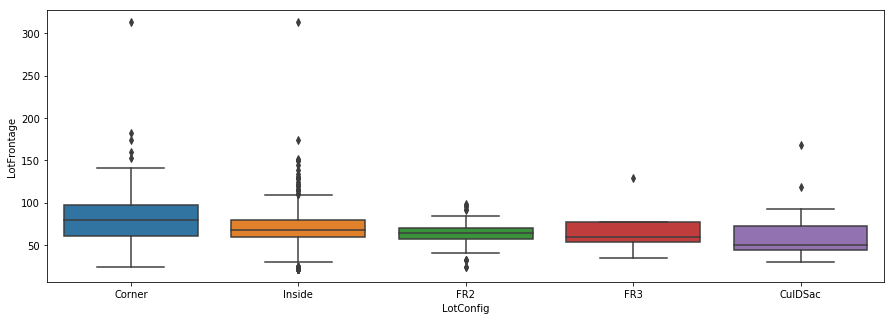

In [46]:
#Lot Frontage: It might depend on the configuration of Lot
plt.subplots(figsize=(15,5))
boxdata = df.groupby('LotConfig')['LotFrontage'].median().sort_values(ascending=False)
order = boxdata.index
sns.boxplot(x='LotConfig', y='LotFrontage', order=order, data=df)

In [48]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [51]:
#We can interpret an NA for all these features where "the house does not have these feature".



bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF']
fire = ['Fireplaces', 'FireplaceQu']
garage = ['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageYrBlt']
masn = ['MasVnrType', 'MasVnrArea']
others = ['Alley', 'Fence', 'PoolQC', 'MiscFeature']

cats = df.columns[df.dtypes == 'object']
nums = list(set(df.columns) - set(cats))

# Be sure the category 'None' is also handled here
df['MasVnrType'].replace({'None': np.nan}, inplace=True)

df[cats] = df[cats].fillna('0')
df[nums] = df[nums].fillna(0)

In [53]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr